<a href="https://colab.research.google.com/github/Kartavyakumar1508/prodigy-infotech/blob/main/EDA_2nd_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [4]:
train = pd.read_csv('/content/train (1).csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train = train.reset_index()
train = train.set_index('Survived')

In [11]:
train.shape

(891, 11)

In [13]:
datadict = pd.DataFrame(train.dtypes)
datadict

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [14]:
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
PassengerId,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [15]:
datadict['NUnique']=train.nunique()
datadict

,0,MissingVal,NUnique
PassengerId,int64,0,891
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248
Cabin,object,687,147


In [16]:
datadict['Count']=train.count()
datadict

,0,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [17]:
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [18]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [19]:
train.describe(include=['number'])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


ValueError: cannot reindex on an axis with duplicate labels

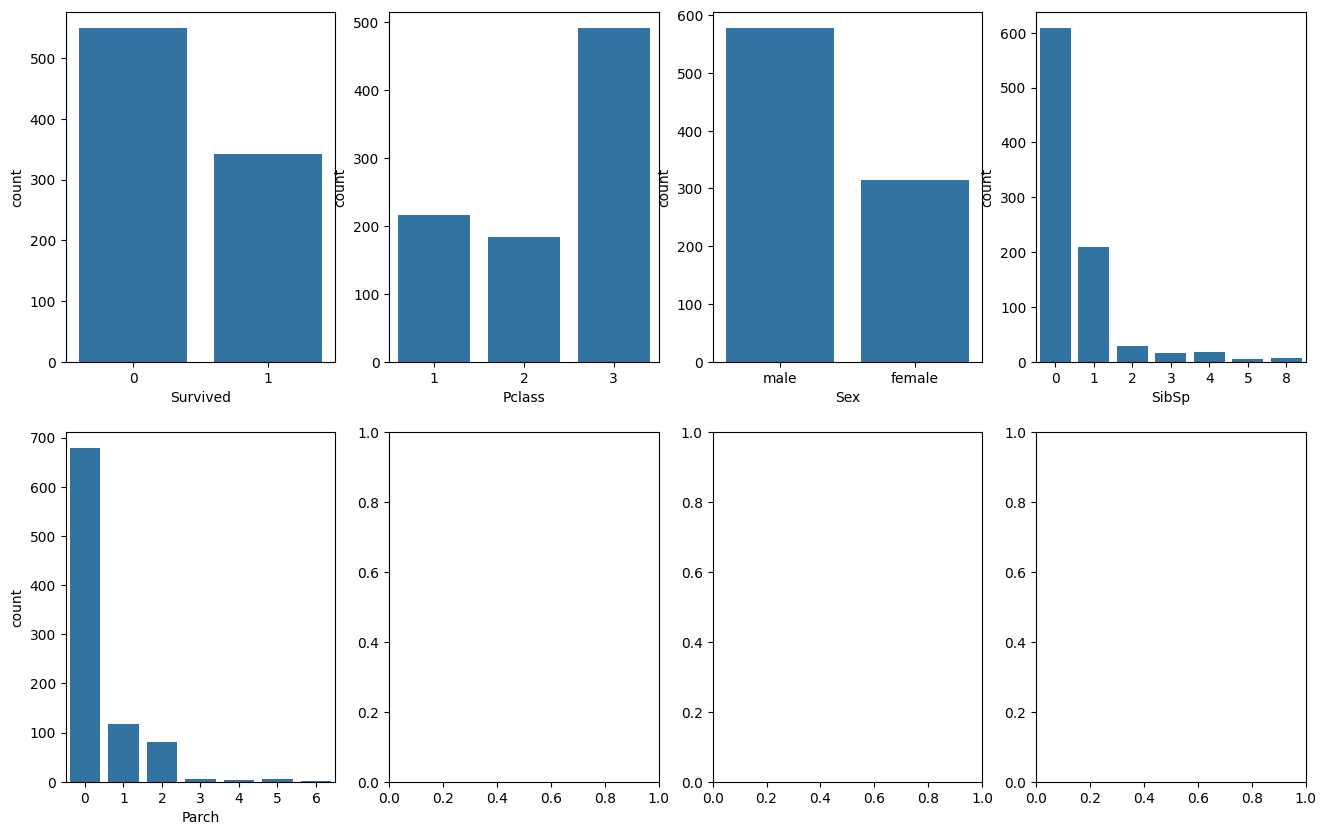

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='Survived',data=train,ax=axes[0,0])
sns.countplot(x='Pclass',data=train,ax=axes[0,1])
sns.countplot(x='Sex',data=train,ax=axes[0,2])
sns.countplot(x='SibSp',data=train,ax=axes[0,3])
sns.countplot(x='Parch',data=train,ax=axes[1,0])
sns.countplot(x='Embarked',data=train,ax=axes[1,1])
sns.distplot(train['Fare'], kde=True,ax=axes[1,2])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

In [28]:
train['Name_len']=train.Name.str.len()

In [29]:
train['Ticket_First']=train.Ticket.str[0]

In [30]:
train['FamilyCount']=train.SibSp+train.Parch

In [31]:
train['Cabin_First']=train.Cabin.str[0]

In [32]:
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [33]:
train.title.value_counts().reset_index()

,title,count
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


In [34]:
print((train.Fare == 0).sum())

15


In [35]:
train.Fare = train.Fare.replace(0, np.NaN)

In [36]:
print((train.Fare == 0).sum())

0


In [37]:
train[train.Fare.isnull()].index

Index([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype='int64', name='Survived')

In [38]:
train.Fare.mean()

32.75564988584475

In [39]:
train.Fare.fillna(train.Fare.mean(),inplace=True)

In [40]:
train[train.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
Survived,,,,,,,,,,,,,,,,


In [41]:
print((train.Age == 0).sum())

0


In [42]:
train.Age.fillna(train.Age.mean(),inplace=True)

In [43]:
train[train.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
Survived,,,,,,,,,,,,,,,,


In [44]:
train.Cabin.isnull().mean()

0.7710437710437711

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 0
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Name_len      891 non-null    int64  
 12  Ticket_First  891 non-null    object 
 13  FamilyCount   891 non-null    int64  
 14  Cabin_First   204 non-null    object 
 15  title         890 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 118.3+ KB


In [46]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_len', 'Ticket_First',
       'FamilyCount', 'Cabin_First', 'title'],
      dtype='object')

In [51]:
train=train.dropna()